In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np


In [3]:
files = [
    "/home/saurav/Desktop/k2-18/jw02372001001_04102_00001-seg001_nrs1_x1dints.fits",
    "/home/saurav/Desktop/k2-18/jw02372001001_04102_00001-seg002_nrs1_x1dints.fits",
    "/home/saurav/Desktop/k2-18/jw02372001001_04102_00001-seg003_nrs1_x1dints.fits",
    "/home/saurav/Desktop/k2-18/jw02372001001_04102_00001-seg001_nrs2_x1dints.fits",
    "/home/saurav/Desktop/k2-18/jw02372001001_04102_00001-seg002_nrs2_x1dints.fits",
    "/home/saurav/Desktop/k2-18/jw02372001001_04102_00001-seg003_nrs2_x1dints.fits"  
]

In [4]:
hdul = fits.open(files[2])
hdul.info()

Filename: /home/saurav/Desktop/k2-18/jw02372001001_04102_00001-seg003_nrs1_x1dints.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     361   ()      
  1  INT_TIMES     1 BinTableHDU     24   1012R x 7C   [J, D, D, D, D, D, D]   
  2  EXTRACT1D     1 BinTableHDU     85   1366R x 18C   [D, D, D, D, D, D, D, D, D, D, D, J, D, D, D, D, D, D]   
  3  EXTRACT1D     2 BinTableHDU     85   1366R x 18C   [D, D, D, D, D, D, D, D, D, D, D, J, D, D, D, D, D, D]   
  4  EXTRACT1D     3 BinTableHDU     85   1366R x 18C   [D, D, D, D, D, D, D, D, D, D, D, J, D, D, D, D, D, D]   
  5  EXTRACT1D     4 BinTableHDU     85   1366R x 18C   [D, D, D, D, D, D, D, D, D, D, D, J, D, D, D, D, D, D]   
  6  EXTRACT1D     5 BinTableHDU     85   1366R x 18C   [D, D, D, D, D, D, D, D, D, D, D, J, D, D, D, D, D, D]   
  7  EXTRACT1D     6 BinTableHDU     85   1366R x 18C   [D, D, D, D, D, D, D, D, D, D, D, J, D, D, D, D, D, D]   
  8  EXTRACT1D     7 BinTableHDU   

In [5]:
num_integration = hdul[0].header["INTEND"] - hdul[0].header["INTSTART"]

num_integration

1011

In [6]:
h = 6.62607015e-34
c = 2.99792458e8
k = 1.380649e-23

def Radiance(wavelength, T):
    wavelength_m = wavelength * 1e-6
    factor = (2 * h * c**2) / (wavelength_m**5)
    exponent = (h * c) / (wavelength_m * k * T)
    return factor / (np.exp(exponent) - 1)

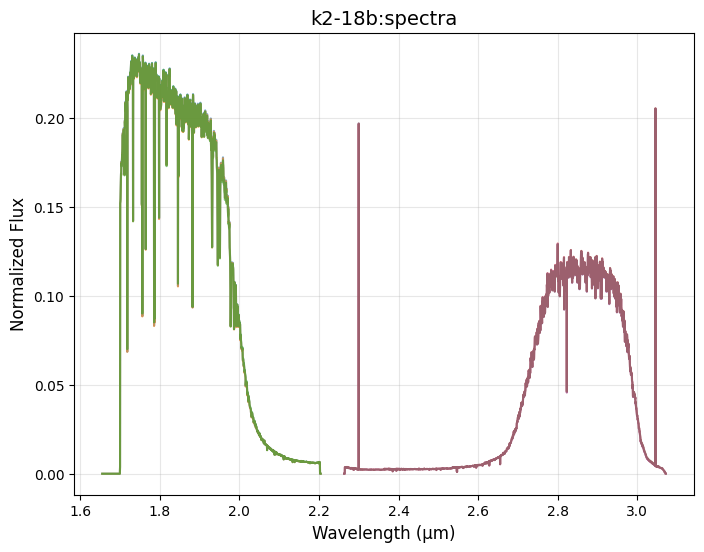

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

plt.figure(figsize=(8, 6))
plt.title("k2-18b:spectra", fontsize=14)

for file in files:

    try:
        with fits.open(file, mode='readonly') as temp:
            
            wavlen = temp[2].data["WAVELENGTH"]  # μm
            flux = temp[2].data["FLUX"]          # Jy or MJy/sr
            num_integration = temp[0].header["INTEND"] - temp[0].header["INTSTART"]
            
            # Sum flux over integrations
            summed_flux = np.zeros_like(flux)
            for j in range(num_integration):
                flux_j = temp[j + 2].data["FLUX"]
                summed_flux = np.nansum([summed_flux, flux_j], axis=0)
            
            # Average flux
            avg_flux = summed_flux / num_integration
            
            plt.plot(wavlen, avg_flux, alpha=0.6)

    except Exception as e:
        print(f"Error processing {file}: {e}")
        continue






plt.xlabel("Wavelength (μm)", fontsize=12)
plt.ylabel("Normalized Flux", fontsize=12)
plt.grid(alpha=0.3)
plt.show()


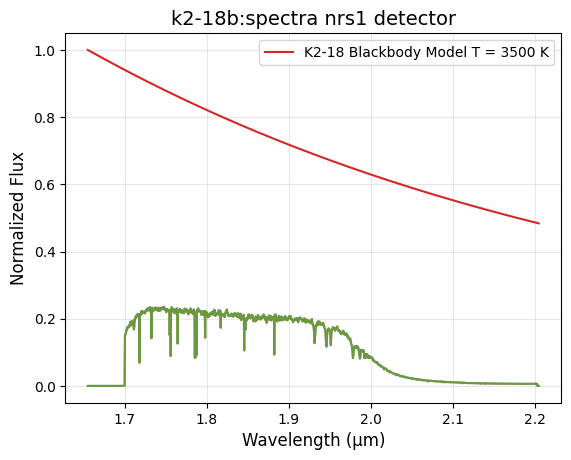

In [8]:
# Nrs1 plots 
for file in files[0:3]:
    try:
        with fits.open(file, mode='readonly') as temp:
            # Extract wavelength and flux
            wavlen = temp[2].data["WAVELENGTH"]  # μm
            flux = temp[2].data["FLUX"]          # Jy or MJy/sr
            num_integration = temp[0].header["INTEND"] - temp[0].header["INTSTART"]
            
            # Sum flux over integrations
            summed_flux = np.zeros_like(flux)
            for j in range(num_integration):
                flux_j = temp[j + 2].data["FLUX"]
                summed_flux = np.nansum([summed_flux, flux_j], axis=0)
            
            # Average flux
            avg_flux = summed_flux / num_integration

            plt.plot(wavlen, avg_flux, alpha=0.6)

    except Exception as e:
        print(f"Error processing {file}: {e}")
        continue



bb_radiance = Radiance(wavlen, 3457)
plt.plot(wavlen, bb_radiance / np.max(bb_radiance), label=f'K2-18 Blackbody Model T = {3500} K')
plt.xlabel("Wavelength (μm)", fontsize=12)
plt.ylabel("Normalized Flux", fontsize=12)
plt.title("k2-18b:spectra nrs1 detector", fontsize=14)
plt.grid(alpha=0.3)
plt.legend()
plt.show()


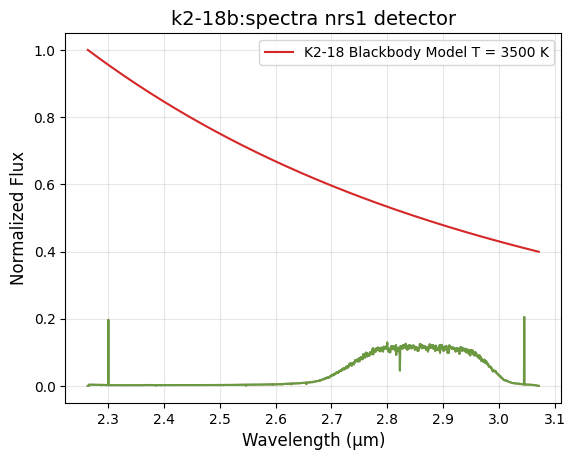

In [ ]:
# Nrs1 plots 
for file in files[3:6]:
    try:
        with fits.open(file, mode='readonly') as temp:
            # Extract wavelength and flux
            wavlen = temp[2].data["WAVELENGTH"]  # μm
            flux = temp[2].data["FLUX"]          # Jy or MJy/sr
            num_integration = temp[0].header["INTEND"] - temp[0].header["INTSTART"]
            
            # Sum flux over integrations
            summed_flux = np.zeros_like(flux)
            for j in range(num_integration):
                flux_j = temp[j + 2].data["FLUX"]
                summed_flux = np.nansum([summed_flux, flux_j], axis=0)
            
            # Average flux
            avg_flux = summed_flux / num_integration

            plt.plot(wavlen, avg_flux, alpha=0.6)

    except Exception as e:
        print(f"Error processing {file}: {e}")
        continue



bb_radiance = Radiance(wavlen, 3457)
plt.plot(wavlen, bb_radiance / np.max(bb_radiance), label=f'K2-18 Blackbody Model T = {3500} K')
plt.xlabel("Wavelength (μm)", fontsize=12)
plt.ylabel("Normalized Flux", fontsize=12)
plt.title("k2-18b:spectra nrs2 detector", fontsize=14)
plt.grid(alpha=0.3)
plt.legend()
plt.show()